In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
data=pd.read_csv("Real_Estate_Sales.csv")

In [ ]:
data.shape

(997213, 11)

In [ ]:
data.sample(10)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
214446,30245,2003,6/17/2004,Madison,53 MIDDLE BCH RD W,1261100,3200000.0,0.394094,Nan,Nan,1
761184,150956,2015,8/22/2016,Stratford,270 BEAVER DAM RD,233520,388750.0,0.600695,Single Family,Single Family,1
313448,40213,2004,02/04/2005,Newtown,27 HAWLEYVILLE RD,376100,630000.0,0.596984,Nan,Nan,1
953287,18267,2018,2/19/2019,West Haven,5 COLONIAL BLVD,194600,170000.0,1.144706,Single Family,Single Family,1
279208,49991,2004,2/18/2005,Manchester,57 WASHINGTON ST,67900,170000.0,0.399412,Nan,Nan,1
228790,31125,2003,07/09/2004,New Britain,461 STANLEY ST,76300,135000.0,0.565185,Nan,Nan,1
674466,130487,2013,06/02/2014,New Britain,44 EDDY GLOVER BLVD,123690,209000.0,0.591818,Single Family,Single Family,1
349434,50479,2005,12/28/2005,Danbury,15 SPRINGSIDE AVE,121700,335000.0,0.363284,Nan,Nan,0
294462,40337,2004,01/06/2005,Greenwich,26 LAKE DR S,694540,2125000.0,0.326842,Nan,Nan,1
669614,13463,2013,01/07/2014,Stamford,60 STRAWBERRY HILL AVENUE # 10,869790,1250000.0,0.695832,Nan,Nan,1


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997213 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997213 non-null  object 
 5   Assessed Value    997213 non-null  int64  
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     997213 non-null  object 
 9   Residential Type  997213 non-null  object 
 10  Years until sold  997213 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 83.7+ MB


In [ ]:
data.isnull().sum()

Serial Number       0
List Year           0
Date Recorded       0
Town                0
Address             0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
Years until sold    0
dtype: int64

In [ ]:
data.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio,Years until sold
count,9.972130e+05,997213.000000,9.972130e+05,9.972130e+05,9.972130e+05,997213.000000
mean,4.311864e+05,2010.189829,2.791437e+05,3.911512e+05,1.044637e+01,0.750900
std,6.549219e+06,6.237877,1.670610e+06,5.347270e+06,1.890192e+03,0.434742
min,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00,-18.000000
25%,3.044400e+04,2004.000000,8.760000e+04,1.400000e+05,4.867000e-01,1.000000
50%,7.030300e+04,2010.000000,1.383900e+05,2.250000e+05,6.246000e-01,1.000000
75%,1.518780e+05,2016.000000,2.255600e+05,3.650000e+05,7.852761e-01,1.000000
max,2.000500e+09,2020.000000,8.815100e+08,5.000000e+09,1.226420e+06,4.000000


In [ ]:
data.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Years until sold'],
      dtype='object')

In [ ]:
data['Property Type'].value_counts() #to check the types of property sold and their popularity

Single Family     401612
Nan               382446
Condo             105420
Residential        60728
Two Family         26408
Three Family       12586
Vacant Land         3163
Four Family         2150
Commercial          1981
Apartments           486
Industrial           228
Public Utility         5
Name: Property Type, dtype: int64

In [ ]:
data.dtypes # checking datatypes

Serial Number         int64
List Year             int64
Date Recorded        object
Town                 object
Address              object
Assessed Value        int64
Sale Amount         float64
Sales Ratio         float64
Property Type        object
Residential Type     object
Years until sold      int64
dtype: object

# CHANGING DATA TYPE

In [ ]:
# in this we need change type of property, residential (object)into category
data["Property Type"]=data["Property Type"].astype('category')
data["Residential Type"]=data["Residential Type"].astype('category') #it helps in saving space or memory
data.dtypes

Serial Number          int64
List Year              int64
Date Recorded         object
Town                  object
Address               object
Assessed Value         int64
Sale Amount          float64
Sales Ratio          float64
Property Type       category
Residential Type    category
Years until sold       int64
dtype: object

In [ ]:
data.sort_values("Assessed Value",ascending=False).head(5) # Sorting

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
846909,170909,2017,8/15/2018,Hamden,42 WARNER ST,881510000,4680000.0,188.356800,Condo,Condo,1
993748,190201,2019,11/13/2019,Waterbury,64 ROBBINS ST,142858700,230043624.0,0.621000,Nan,Nan,0
797865,150018,2015,10/19/2015,Suffield,TAINTOR ST,138958820,45319.0,3066.237560,Nan,Nan,0
759246,150017,2015,10/19/2015,Suffield,TAINTOR ST,138958820,40356.0,3443.324908,Nan,Nan,0
780886,150016,2015,10/19/2015,Suffield,TAINTOR ST,138958820,90096.0,1542.341724,Nan,Nan,0


#Mathematical operation

In [ ]:
data["Years until sold"].mean() # mathematical operation

0.7508997576244995

In [ ]:
data["Sale Amount"].mean()

391151.18354119925

In [ ]:
data["Assessed Value"].median()

138390.0

# SELECTING RANDOM DATA

In [ ]:
data.sample(n=10) #for 10 random samples

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
135836,10010,2001,10/17/2001,Weston,32 LITTLE FOX LN,244930,540000.0,0.453574,Nan,Nan,0
324580,40086,2004,5/17/2005,Washington,58 SHEARER RD,372260,362500.0,1.026924,Nan,Nan,1
502880,80179,2008,09/01/2009,Ellington,1 ABBOTT RD #45,76180,133000.0,0.572782,Condo,Condo,1
858925,170467,2017,3/29/2018,Stratford,53 CANAAN RD,140070,222000.0,0.630900,Single Family,Single Family,1
279358,40700,2004,7/21/2005,Enfield,1 ROCKLAND DR,96320,55000.0,1.751273,Nan,Nan,1
410236,60252,2006,5/31/2007,Guilford,607 LONG HILL RD,194840,370000.0,0.526595,Single Family,Single Family,1
916675,180025,2018,03/06/2019,Canaan,354 ROUTE 7 N,567000,540000.0,1.050000,Single Family,Single Family,1
760042,150221,2015,03/10/2016,Branford,29 OLD HICKORY LA,193800,260000.0,0.745385,Single Family,Single Family,1
922958,180047,2018,11/09/2018,Waterford,9 CHARLES AVE,130030,53300.0,2.439500,Single Family,Single Family,0
142903,20719,2002,5/16/2003,Fairfield,32 CLINTON ST,239820,442000.0,0.542579,Nan,Nan,1


# Modelling
This is a simple linear regression example using a subset of features. You may need to adjust the features, explore other regression algorithms, or perform additional preprocessing based on the characteristics of your data and the specific problem you are trying to solve

In [ ]:
selected_town = 'Manchester'

In [ ]:
# Filter the dataset for the selected town
town_data = data[data['Town'] == selected_town]

In [ ]:
# Drop unnecessary columns
columns_to_drop = ['Serial Number', 'Date Recorded', 'Address', 'Town']
town_data.drop(columns=columns_to_drop, inplace=True)

<ipython-input-32-16f78af5c3e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  town_data.drop(columns=columns_to_drop, inplace=True)


In [ ]:
# Select features and target variable
features = ['Assessed Value', 'Sales Ratio', 'Years until sold']
target = 'Sale Amount'

In [ ]:
import numpy as np
town_data['Assessed Value'] = np.log(town_data['Assessed Value']+1)
town_data[target] = np.log(town_data[target]+1)


<ipython-input-34-96ee3f3a5f04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  town_data['Assessed Value'] = np.log(town_data['Assessed Value']+1)
<ipython-input-34-96ee3f3a5f04>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  town_data[target] = np.log(town_data[target]+1)


In [ ]:
# Split the data into features (X) and target variable (y)
X = town_data[features]
y = town_data[target]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
# Initialize and train Lasso (L1) regression model
lasso_model = Lasso(max_iter=100000)  # Set the regularization strength (alpha) parameter
lasso_model.fit(X_train, y_train)

# Initialize and train Ridge (L2) regression model
ridge_model = Ridge()  # Set the regularization strength (alpha) parameter
ridge_model.fit(X_train, y_train)

# Make predictions on the testing set for both models
lasso_pred = lasso_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)

# Calculate Mean Squared Error (MSE) for Lasso model
lasso_mse = mean_squared_error(y_test, lasso_pred)

# Calculate Mean Squared Error (MSE) for Ridge model
ridge_mse = mean_squared_error(y_test, ridge_pred)

print("Mean Squared Error (MSE) for Lasso:", lasso_mse)
print("Mean Squared Error (MSE) for Ridge:", ridge_mse)
lasso_r2=r2_score(y_test,lasso_pred)
print(lasso_r2)
ridge_r2=r2_score(y_test,ridge_pred)
print(ridge_r2)

Mean Squared Error (MSE) for Lasso: 0.5180773388608596
Mean Squared Error (MSE) for Ridge: 0.41274763193148617
6.995250889707538e-05
0.20336457852688394


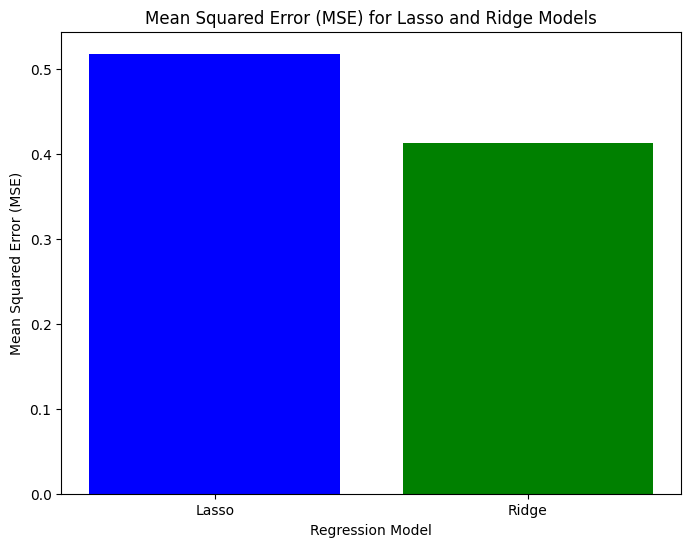

In [ ]:
# Plotting the MSE for Lasso and Ridge models
plt.figure(figsize=(8, 6))
plt.bar(['Lasso', 'Ridge'], [lasso_mse, ridge_mse], color=['blue', 'green'])
plt.xlabel('Regression Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) for Lasso and Ridge Models')
plt.show()


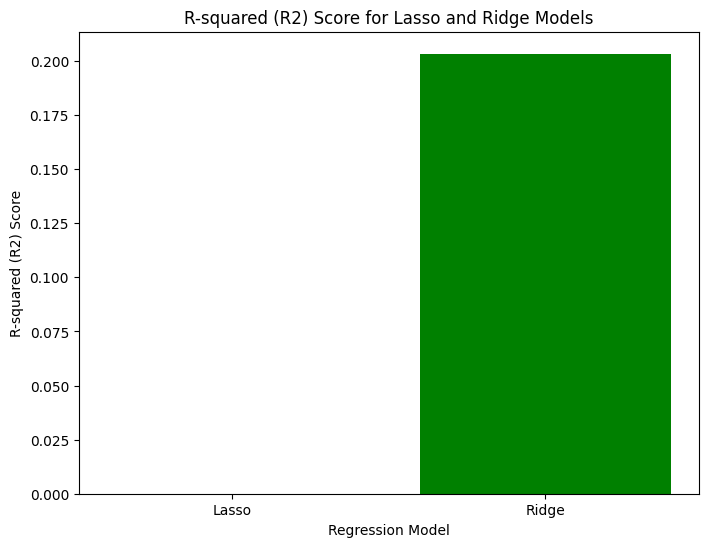

In [ ]:
# Plotting the R-squared (R2) score for Lasso and Ridge models
plt.figure(figsize=(8, 6))
plt.bar(['Lasso', 'Ridge'], [lasso_r2, ridge_r2], color=['blue', 'green'])
plt.xlabel('Regression Model')
plt.ylabel('R-squared (R2) Score')
plt.title('R-squared (R2) Score for Lasso and Ridge Models')
plt.show()

In [ ]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [ ]:
# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaler, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaler)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.4127482239336625
R-squared: 0.20336343591608064


In [ ]:
# Iterate over each unique town and create scatter plots
# for town in data['Town'].unique():
#     town_data = data[data['Town'] == selected_town]
#     plt.figure(figsize=(10, 6))
#     plt.scatter(town_data[features[0]], town_data[target], label=features[0])
#     plt.scatter(town_data[features[1]], town_data[target], label=features[1])
#     plt.scatter(town_data[features[2]], town_data[target], label=features[2])
#     plt.title(f'Scatter Plot for {town}')
#     plt.xlabel('Feature Values')
#     plt.ylabel('Sale Amount')
#     plt.legend()
#     plt.show()


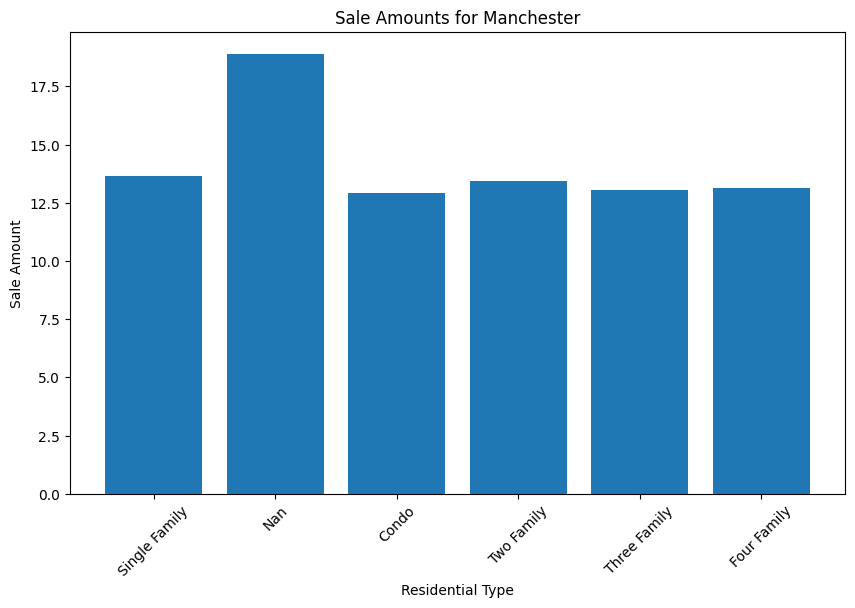

In [ ]:
import matplotlib.pyplot as plt
selected_town = 'Manchester'
#Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(town_data['Residential Type'], town_data['Sale Amount'])
plt.title(f'Sale Amounts for {selected_town}')
plt.xlabel('Residential Type')
plt.ylabel('Sale Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

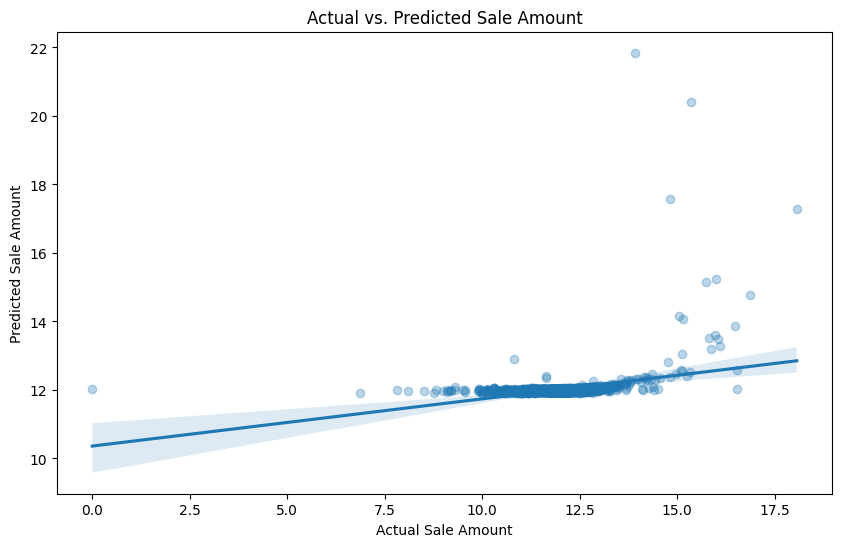

In [ ]:
# Visualize predictions vs. actual values using Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.3})
plt.xlabel('Actual Sale Amount')
plt.ylabel('Predicted Sale Amount')
plt.title('Actual vs. Predicted Sale Amount')
plt.show()

VISUALIZING DATA

which property gets sold immediately or without much delay? (By this we can analyze which type of properties buyers are more interested in )

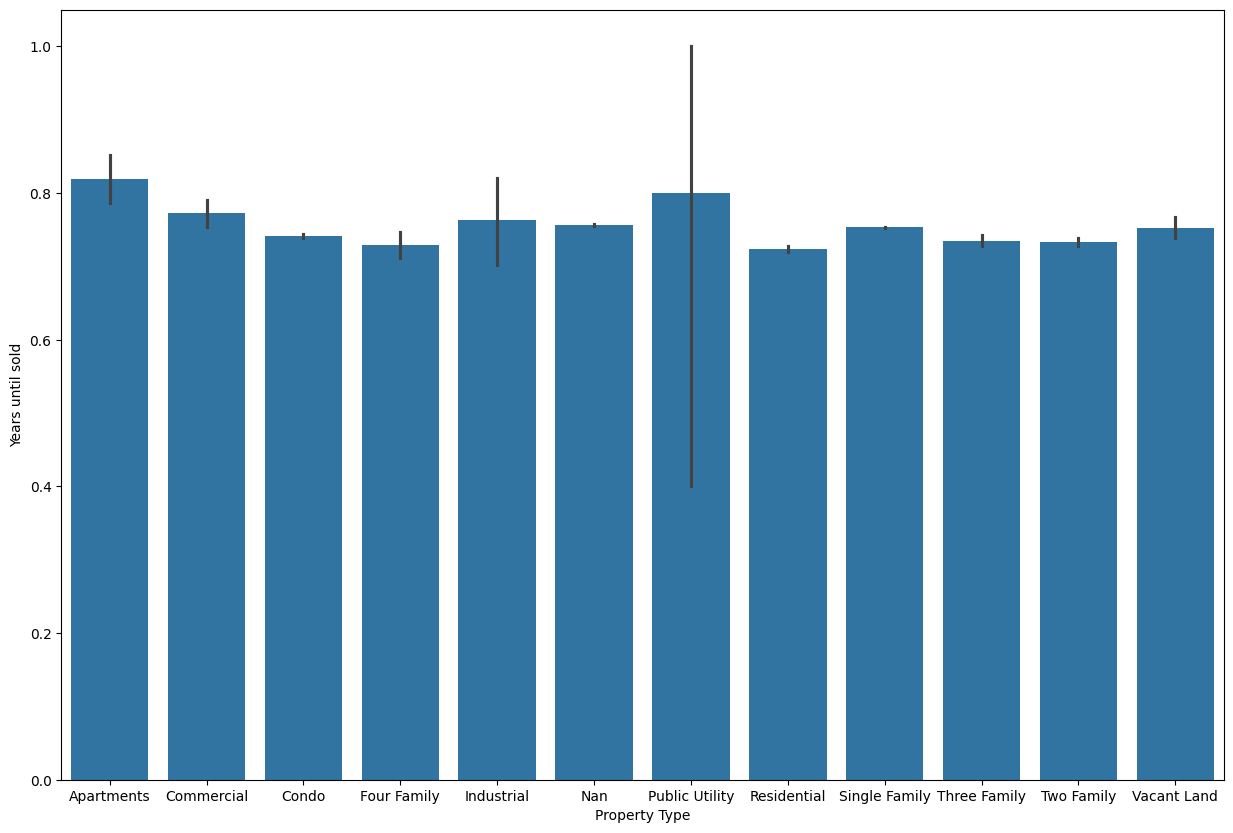

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x="Property Type",y="Years until sold",data =data)
plt.show()

# To find sales in each year

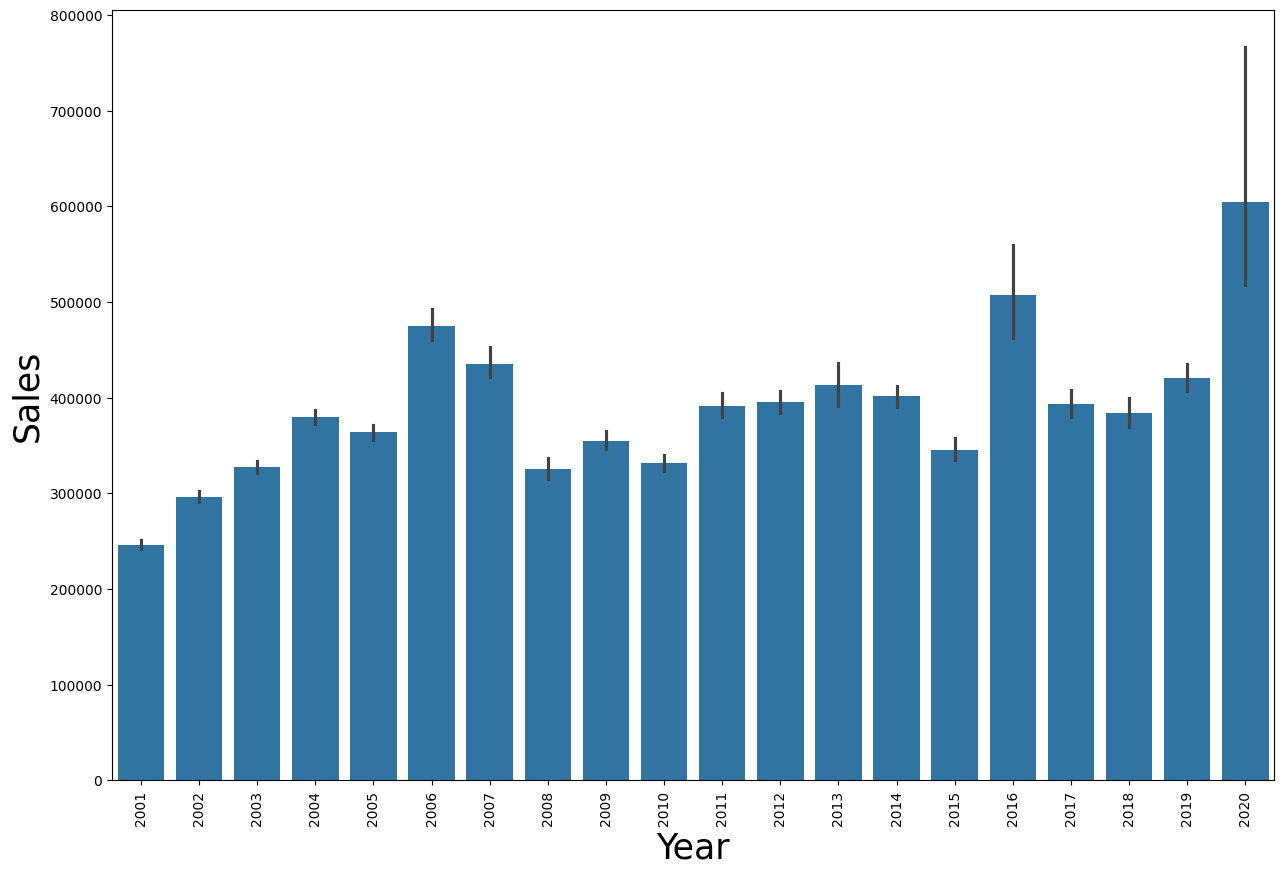

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x="List Year", y="Sale Amount", data=data)   #Note use of barplot which allows us to compare different sets of data among different groups easily.
plt.xticks(rotation='vertical')
plt.ylabel('Sales',fontsize=25)                         #Note labelling of y-axis
plt.xlabel('Year',fontsize=25)                          #Note labelling of x_axis
plt.show()

# number of properties sold in each year
summary In this comprehensive analysis of the real estate sales dataset, we delved into the intricacies of property transactions to extract meaningful insights. Leveraging data analytical techniques, the study focuses on uncovering key trends, identifying regional variations, and understanding the factors influencing property values

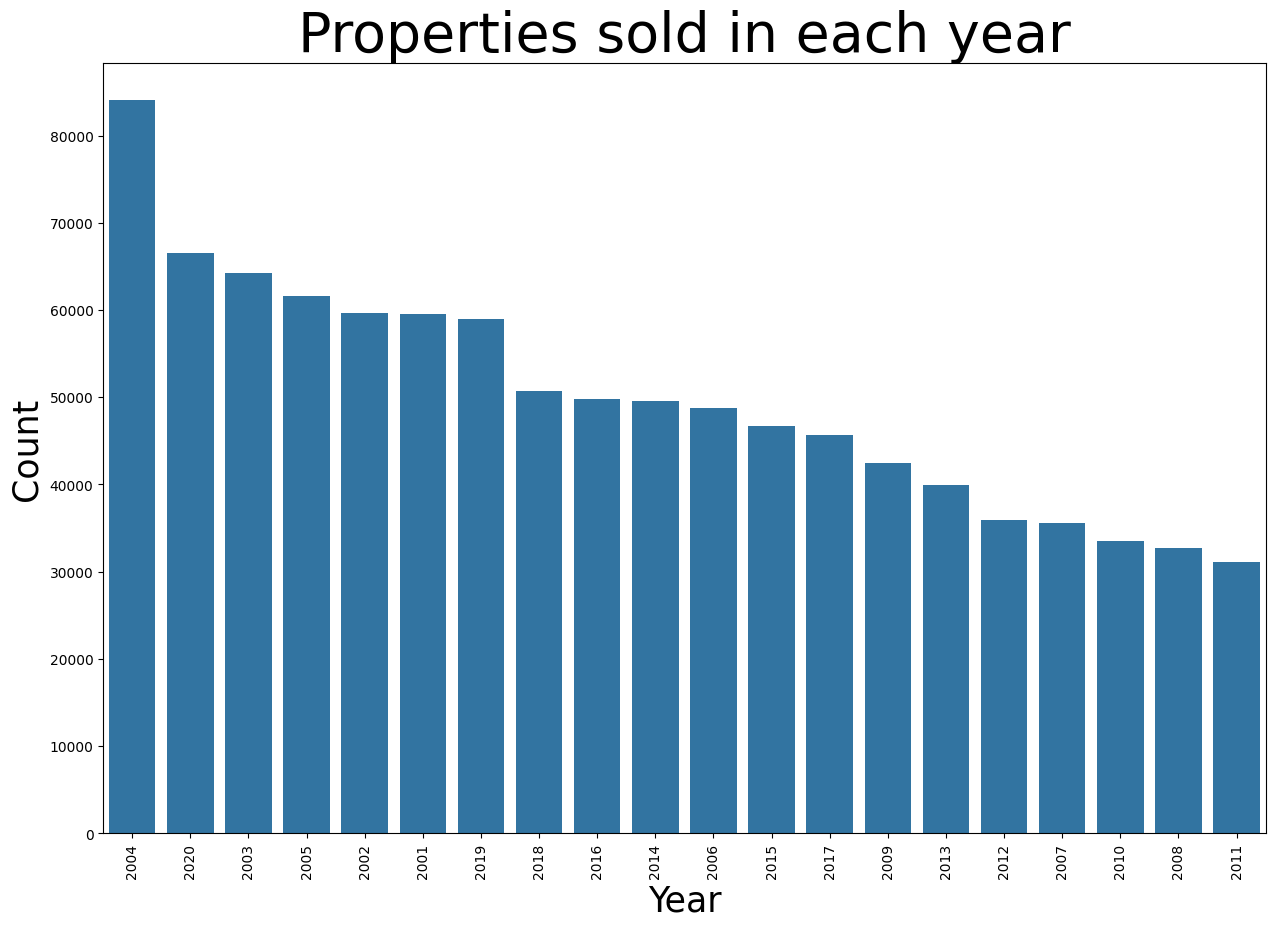

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="List Year",data=data, order = data.groupby(by=['List Year'])['Property Type'].count().sort_values(ascending=False).index)
plt.xticks(rotation='vertical')
plt.title('Properties sold in each year',fontsize=40)    #Note adding a title to the data
plt.ylabel('Count',fontsize = 25)                     #Note labelling the y-axis by count.
plt.xlabel('Year',fontsize = 25)                      #Note labelling the x-axis by year.
plt.show()